<a href="https://colab.research.google.com/github/Manya123-max/Deep-Learning-Algorithms-/blob/main/Deep10_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
max_features = 10000 # Top 10,000 most frequent words
max_len = 200 # Maximum number of words to consider in each review
embedding_dim = 256  # You can experiment with different values
num_classes = 2

In [ ]:
# 1. Load IMDb dataset (already preprocessed into integer sequences)
max_features = 10000 # Top 10,000 most frequent words
maxlen = 200 # Maximum number of words to consider in each review
print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# Pad sequences to ensure uniform input size
# 2. Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

"""IMDb dataset, which contains movie reviews preprocessed into integer sequences. Each integer
represents a unique word in the dataset's vocabulary.
Limit the vocabulary size to the top 10,000 most frequent words using num_words=max_features.
Sequences are padded to a maximum length of 200 words using pad_sequences().
This ensures all input sequences are of the same length."""

Loading data...
x_train shape: (25000, 200)
x_test shape: (25000, 200)


"IMDb dataset, which contains movie reviews preprocessed into integer sequences. Each integer\nrepresents a unique word in the dataset's vocabulary.\nLimit the vocabulary size to the top 10,000 most frequent words using num_words=max_features.\nSequences are padded to a maximum length of 200 words using pad_sequences().\nThis ensures all input sequences are of the same length."

In [ ]:
classification_type = "binary"  # Change to "multi-class" or "multi-label" as needed

if classification_type == "binary":
    # Binary classification
    num_classes = 1  # Binary classification output: 0 or 1
    activation = 'sigmoid'  # Sigmoid for binary classification
    loss = 'binary_crossentropy'  # Binary cross-entropy loss

elif classification_type == "multi-class":
    # Multi-class classification
    num_classes = 3  # Example: 3 classes
    activation = 'softmax'  # Softmax for multi-class classification
    loss = 'categorical_crossentropy'  # Categorical cross-entropy loss
    y_train = to_categorical(y_train, num_classes)  # Convert labels to one-hot encoding
    y_test = to_categorical(y_test, num_classes)

elif classification_type == "multi-label":
    # Multi-label classification
    num_classes = 3  # Example: 3 labels (each sample may belong to multiple labels)
    activation = 'sigmoid'  # Sigmoid for multi-label classification
    loss = 'binary_crossentropy'  # Binary cross-entropy loss
    # Ensure labels are multi-hot encoded (for illustration only, adjust per dataset)

In [ ]:
# Define the model
model = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dim),
    GRU(units=64, return_sequences=True),
    Dropout(0.3),  # Dropout to reduce overfitting
    GRU(units=32, return_sequences=False),
    Dropout(0.3),  # Dropout before the Dense layer
    Dense(num_classes, activation=activation)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Use binary crossentropy for multi-label classification

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop training if no improvement for 3 epochs
    restore_best_weights=True  # Restore weights from the best epoch
)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 313ms/step - accuracy: 0.7020 - loss: 0.5517 - val_accuracy: 0.8496 - val_loss: 0.3807
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 310ms/step - accuracy: 0.9065 - loss: 0.2441 - val_accuracy: 0.8812 - val_loss: 0.3044
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 309ms/step - accuracy: 0.9544 - loss: 0.1291 - val_accuracy: 0.8724 - val_loss: 0.3285
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 308ms/step - accuracy: 0.9779 - loss: 0.0709 - val_accuracy: 0.8642 - val_loss: 0.4166
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 303ms/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0.8558 - val_loss: 0.5351


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.8545 - loss: 0.5588
Test Accuracy: 0.86


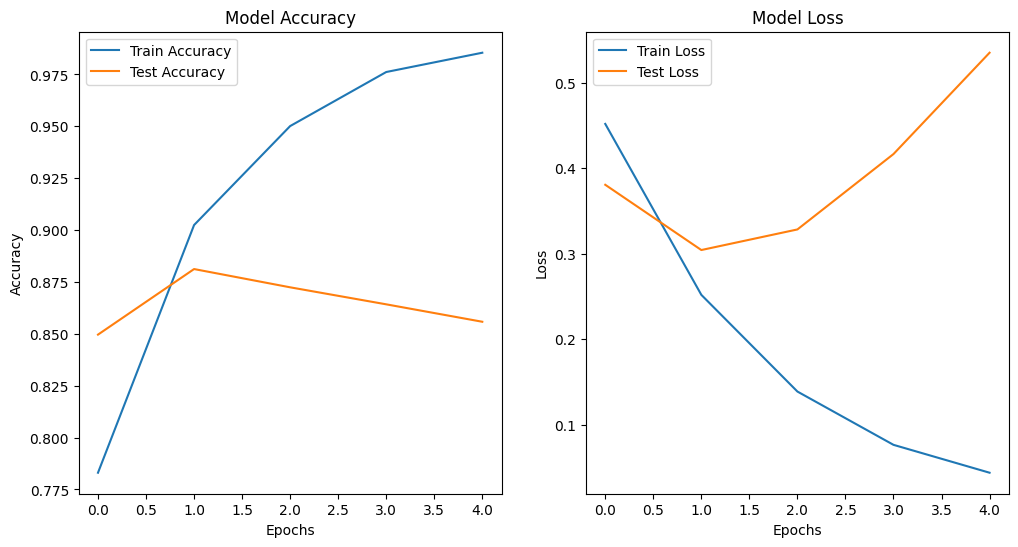

In [ ]:
import matplotlib.pyplot as plt
# 5. Plotting the training and validation accuracy/loss
plt.figure(figsize=(12, 6))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Define predict_sentiment function first
def predict_sentiment(review):
 # Tokenize the input review
 review_seq = imdb.get_word_index()  # Assuming 'imdb' is defined and has get_word_index()
 review = review.lower().split()
 review = [review_seq[word] if word in review_seq else 0 for word in review]
 review = pad_sequences([review], maxlen=max_len)  # Assuming 'maxlen' is defined

 # Predict sentiment (0: negative, 1: positive)
 prediction = model.predict(review)
 return "Positive" if prediction >= 0.5 else "Negative"

# Now you can call the function
sample_review = "I hate this movie!"
print(f"Review: {sample_review}\nPrediction: {predict_sentiment(sample_review)}")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
Review: I hate this movie!
Prediction: Negative
